In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Traffic.csv")

In [3]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
df = data.copy()

In [6]:
df.shape

(2976, 9)

In [7]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [11]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit([df['Day of the week']])
#enc.categories_
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])

In [12]:
#Using pandas
#dummies = pd.get_dummies(df['Day of the week'])
#df_onehot = pd.concat([dummies,df], axis = 1)
#df_onehot.drop("Day of the week",axis=1,inplace=True)
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,31,0,4,4,39,low
1,12:15:00 AM,10,5,49,0,3,3,55,low
2,12:30:00 AM,10,5,46,0,3,6,55,low
3,12:45:00 AM,10,5,51,0,2,5,58,low
4,1:00:00 AM,10,5,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,4,16,3,1,36,56,normal
2972,11:00:00 PM,9,4,11,0,1,30,42,normal
2973,11:15:00 PM,9,4,15,4,1,25,45,normal
2974,11:30:00 PM,9,4,16,5,0,27,48,normal


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   int32 
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int32(1), int64(6), object(2)
memory usage: 197.8+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])
print(df['Traffic Situation'])

0       2
1       2
2       2
3       2
4       3
       ..
2971    3
2972    3
2973    3
2974    3
2975    3
Name: Traffic Situation, Length: 2976, dtype: int64


In [16]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,31,0,4,4,39,2
1,12:15:00 AM,10,5,49,0,3,3,55,2
2,12:30:00 AM,10,5,46,0,3,6,55,2
3,12:45:00 AM,10,5,51,0,2,5,58,2
4,1:00:00 AM,10,5,57,6,15,16,94,3
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,4,16,3,1,36,56,3
2972,11:00:00 PM,9,4,11,0,1,30,42,3
2973,11:15:00 PM,9,4,15,4,1,25,45,3
2974,11:30:00 PM,9,4,16,5,0,27,48,3


In [17]:
#Removing AM and PM from Time column
df['Time'] = df['Time'].str.replace(' AM', '').str.replace(' PM', '')

In [18]:
#This time format cannot be used in Algorithm
#Converting with respect to hours and minutes

df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute

#Removing Time column
df = df.drop(['Time'],axis = 1)

In [19]:
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute
0,10,5,31,0,4,4,39,2,12,0
1,10,5,49,0,3,3,55,2,12,15
2,10,5,46,0,3,6,55,2,12,30
3,10,5,51,0,2,5,58,2,12,45
4,10,5,57,6,15,16,94,3,1,0
...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,3,10,45
2972,9,4,11,0,1,30,42,3,11,0
2973,9,4,15,4,1,25,45,3,11,15
2974,9,4,16,5,0,27,48,3,11,30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Date               2976 non-null   int64
 1   Day of the week    2976 non-null   int32
 2   CarCount           2976 non-null   int64
 3   BikeCount          2976 non-null   int64
 4   BusCount           2976 non-null   int64
 5   TruckCount         2976 non-null   int64
 6   Total              2976 non-null   int64
 7   Traffic Situation  2976 non-null   int64
 8   hour               2976 non-null   int64
 9   minute             2976 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 221.0 KB


In [21]:
df['Traffic Situation'].value_counts()

3    1669
0     682
1     321
2     304
Name: Traffic Situation, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['Traffic Situation'],axis=1)
Y = df['Traffic Situation']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [24]:
X_train.shape

(2380, 9)

In [26]:
y_train.value_counts()

3    1332
0     563
1     257
2     228
Name: Traffic Situation, dtype: int64

In [27]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[9]))
model.add(keras.layers.Dense(9,activation=activation))
model.add(keras.layers.Dense(6,activation=activation))
model.add(keras.layers.Dense(4,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 178 (712.00 Byte)
Trainable params: 178 (712.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30)

Epoch 1/30
75/75 [==============================] - 3s 12ms/step - loss: 2.5197 - accuracy: 0.2403 - val_loss: 1.6740 - val_accuracy: 0.3641
Epoch 2/30
75/75 [==============================] - 0s 6ms/step - loss: 1.3063 - accuracy: 0.5210 - val_loss: 1.2294 - val_accuracy: 0.6007
Epoch 3/30
75/75 [==============================] - 0s 6ms/step - loss: 1.0440 - accuracy: 0.6433 - val_loss: 1.0310 - val_accuracy: 0.6393
Epoch 4/30
75/75 [==============================] - 0s 6ms/step - loss: 0.9214 - accuracy: 0.6685 - val_loss: 0.9327 - val_accuracy: 0.6577
Epoch 5/30
75/75 [==============================] - 0s 6ms/step - loss: 0.8457 - accuracy: 0.6870 - val_loss: 0.8739 - val_accuracy: 0.6544
Epoch 6/30
75/75 [==============================] - 0s 7ms/step - loss: 0.7959 - accuracy: 0.6912 - val_loss: 0.8365 - val_accuracy: 0.6661
Epoch 7/30
75/75 [==============================] - 1s 7ms/step - loss: 0.7583 - accuracy: 0.6975 - val_loss: 0.7847 - val_accuracy: 0.6795
Epoch 8/30
75/75 [=

19/19 [==============================] - 0s 3ms/step
accuracy : 0.7802013422818792


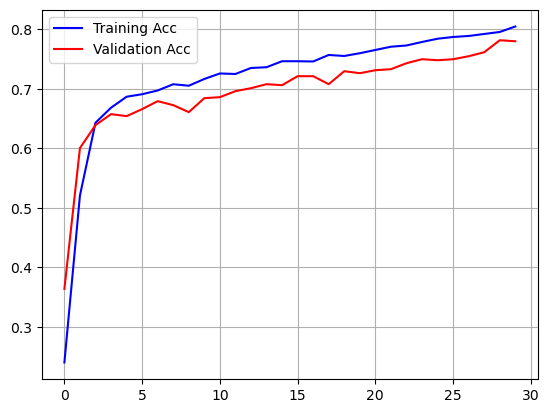

In [32]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = metrics.accuracy_score(y_test,y_pred)
#precision = metrics.precision_score(y_test,y_pred)
#recall = metrics.recall_score(y_test,y_pred)

print(f'accuracy : {acc}')